In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
main = pd.read_csv("/content/2021_development.csv")
main.head(3)

,HDI rank,Country,Human Development Index (HDI) - 2021,Life expectancy at birth - 2021,Expected years of schooling - 2021,Mean years of schooling - 2021,Gross national income (GNI) per capita - 2021
0,1.0,Switzerland,0.962,84.0,16.5,13.9,66933.0
1,2.0,Norway,0.961,83.2,18.2,13.0,64660.0
2,3.0,Iceland,0.959,82.7,19.2,13.8,55782.0


Data Cleaning:

In [ ]:
main.isnull().sum()

,0
HDI rank,0
Country,0
Human Development Index (HDI) - 2021,0
Life expectancy at birth - 2021,0
Expected years of schooling - 2021,0
Mean years of schooling - 2021,0
Gross national income (GNI) per capita - 2021,0


In [ ]:
main = main.drop(columns=['HDI rank', 'Country'])

In [ ]:
main.columns

Index(['Human Development Index (HDI) - 2021',
       'Life expectancy at birth - 2021', 'Expected years of schooling - 2021',
       'Mean years of schooling - 2021',
       'Gross national income (GNI) per capita - 2021'],
      dtype='object')

In [ ]:
main = main.rename(columns={'Human Development Index (HDI) - 2021' : 'hdi',
                            'Life expectancy at birth - 2021' : 'life_expectancy',
                            'Expected years of schooling - 2021' : 'expected_years',
                            'Mean years of schooling - 2021' : 'mean_years_schooling',
                            'Gross national income (GNI) per capita - 2021' : 'gni_capita'})

In [ ]:
main

,hdi,life_expectancy,expected_years,mean_years_schooling,gni_capita
0,0.962,84.0,16.5,13.9,66933.0
1,0.961,83.2,18.2,13.0,64660.0
2,0.959,82.7,19.2,13.8,55782.0
3,0.952,85.5,17.3,12.2,62607.0
4,0.951,84.5,21.1,12.7,49238.0
...,...,...,...,...,...
186,0.426,61.7,10.7,3.1,732.0
187,0.404,53.9,8.0,4.3,966.0
188,0.400,61.6,7.0,2.1,1240.0
189,0.394,52.5,8.0,2.6,1364.0


## Regressão Linear:

Correlação e teste de linearidade:

<Axes: >

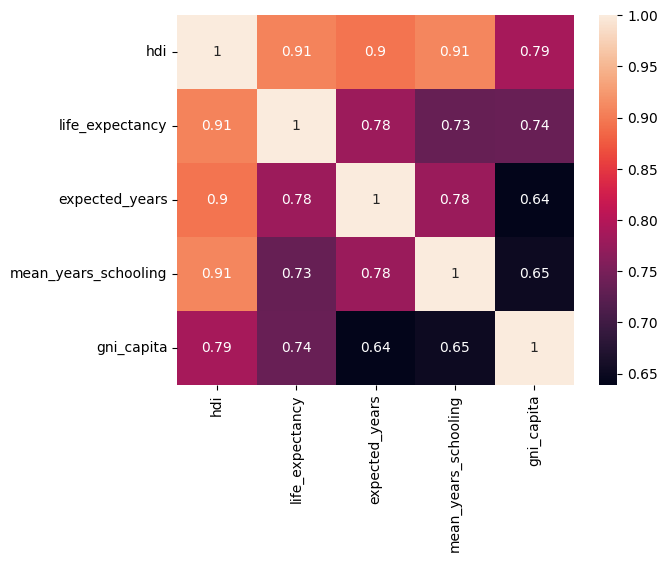

In [ ]:
corr = main.corr()

sns.heatmap(corr, annot=True)

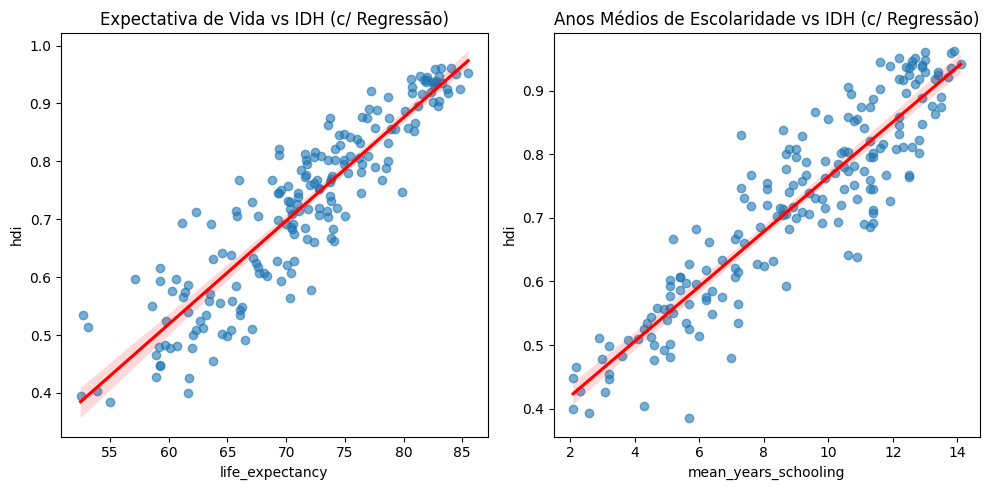

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))


sns.regplot(data=main, x='life_expectancy', y='hdi', ax=ax[0], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
ax[0].set_title('Expectativa de Vida vs IDH (c/ Regressão)')

sns.regplot(data=main, x='mean_years_schooling', y='hdi', ax=ax[1], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
ax[1].set_title('Anos Médios de Escolaridade vs IDH (c/ Regressão)')

fig.tight_layout()

A coluna 'life_expectancy' possui uma relação muito positiva com IDH, porém o formato de "fan-shaped" pode causar problemas no teste de homocedasticidade.

Criando o modelo de regressão:

In [ ]:
X = main[['life_expectancy']].values
y = main[['hdi']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
lin_reg = LinearRegression()

lin_reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
r2_train = lin_reg.score(X_train, y_train)
print(f"R² no conjunto de Treino: {r2_train:.4f}")

r2_test = lin_reg.score(X_test, y_test)
print(f"R² no conjunto de Teste:  {r2_test:.4f}")

R² no conjunto de Treino: 0.8071
R² no conjunto de Teste:  0.8623


Homocedasticidade (resíduos constantes):


In [ ]:
y_pred = lin_reg.predict(X_teste).flatten()
y_test = y_test.flatten()
residuals = y_test - y_pred

In [ ]:
residuals

array([-0.20030173, -0.36634005,  0.0228559 , -0.22831258, -0.13263362,
       -0.19397563,  0.20414946, -0.12911735,  0.17148641,  0.10494339,
       -0.36995972, -0.19355191, -0.38232921,  0.38568236,  0.0285457 ,
        0.0835081 , -0.41779125, -0.01278546, -0.12994888,  0.22333456,
        0.155182  ,  0.24463319, -0.13940513, -0.11110578, -0.15598648,
       -0.33548684, -0.29629089,  0.10856812,  0.2255081 , -0.01327426,
        0.18336132,  0.27297014, -0.15949768,  0.17749798,  0.32119863,
        0.21998099,  0.17069321, -0.02156276,  0.02264404])

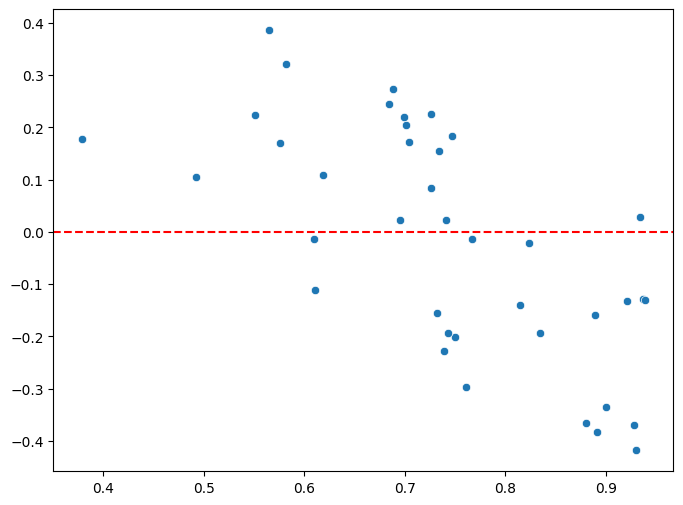

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

Verificar a presença de outliers:

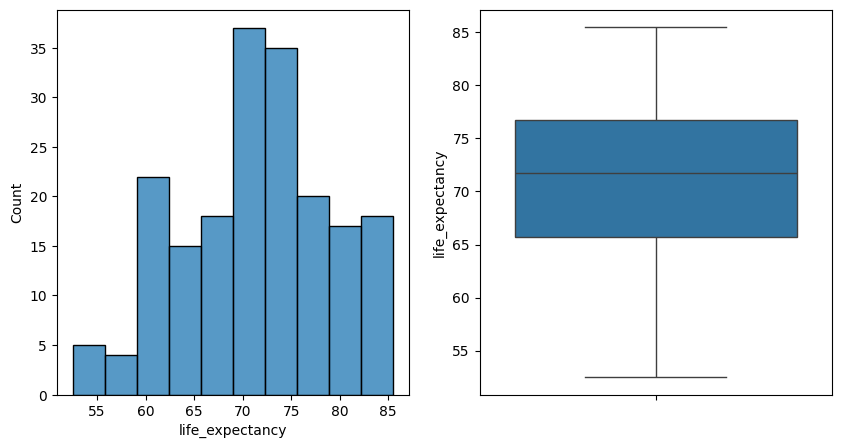

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

sns.histplot(main, x='life_expectancy', bins = 10, ax=ax[0])
sns.boxplot(main, y='life_expectancy', ax=ax[1])
fig.show()

### Simples:

1. Relação linear entre variáveis independentes e dependentes.
2. Sem presença de outliers.
3. Passar no teste de homocedasticidade.
4. Resíduos normalmente distribuídos com média 0 e variância constante.
5. Ausência de multicolinearidade e autocorrelação.

1. Relação linear entre variáveis independentes e dependentes:

2. Sem presença de outliers:

In [ ]:
life_exp = main['life_expectancy']


3. Passar no teste de homocedasticidade.
